In [28]:
import os
PATH = r"C:\Users\yana\Desktop\github\trade_index\notebooks"
os.chdir(PATH)
import pandas as pd
import numpy as np
from set_init import dfs_input, config, config_meta
from dlbond.utils.metabacktester import MetaBacktester, ResultAnalyst

In [248]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
analyst = ResultAnalyst(is_feature_select=True)
result_summary = analyst.report_result()
wealth_summary = analyst.report_wealth()

models_info = analyst.extract_models_info(result_summary, model_num=10)

In [4]:
import datetime as dt
metabt = MetaBacktester(
    dfs_input, 
    models_info,
    is_purmit_including_leak=False
    )
start_date=dt.datetime(2018, 1, 1) 
end_date=dt.datetime(2018, 12, 31)
report_result = metabt.report_all(
    start_date=start_date, 
    end_date=end_date, 
    mode="term_last", 
    hyperparams_imp=config_meta["hyperparams_imp"]
    )

Finished loading model, total used 1 iterations
Finished loading model, total used 4 iterations
Finished loading model, total used 11 iterations
Finished loading model, total used 35 iterations
Finished loading model, total used 31 iterations
Finished loading model, total used 165 iterations
Finished loading model, total used 62 iterations
Finished loading model, total used 1 iterations
Finished loading model, total used 19 iterations
Finished loading model, total used 1 iterations
Finished loading model, total used 23 iterations
Finished loading model, total used 41 iterations
Finished loading model, total used 1 iterations
Finished loading model, total used 4 iterations
Finished loading model, total used 2 iterations
Finished loading model, total used 4 iterations
Finished loading model, total used 41 iterations
Finished loading model, total used 1 iterations
Finished loading model, total used 16 iterations
Finished loading model, total used 4 iterations
Finished loading model, total

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


unsupervised learning 2


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



unsupervised learning 3


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



unsupervised learning 4


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



unsupervised learning 5


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



unsupervised learning 6


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



unsupervised learning 7


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



unsupervised learning 8


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



unsupervised learning 9


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



unsupervised learning 10


C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

C:\Users\yana\anaconda3\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass copy=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



Finished loading model, total used 1 iterations
Finished loading model, total used 4 iterations
Finished loading model, total used 11 iterations
Finished loading model, total used 35 iterations
Finished loading model, total used 31 iterations
Finished loading model, total used 165 iterations
Finished loading model, total used 62 iterations
Finished loading model, total used 1 iterations
Finished loading model, total used 19 iterations
Finished loading model, total used 1 iterations
Finished loading model, total used 23 iterations
Finished loading model, total used 41 iterations
Finished loading model, total used 1 iterations
Finished loading model, total used 4 iterations
Finished loading model, total used 2 iterations
Finished loading model, total used 4 iterations
Finished loading model, total used 41 iterations
Finished loading model, total used 1 iterations
Finished loading model, total used 16 iterations
Finished loading model, total used 4 iterations
Finished loading model, total

In [35]:
score_ = report_result["ensembled"]["performance"]
fig = go.Figure(
    data=[go.Table(
        header=dict(values=[""] + list(score_.columns)),
        cells=dict(values=[list(score_.index)] + [[int(j) if not isinstance(j, float) or np.abs(j) > 100 else round(j, 3) for j in list(score_.iloc[:,i])] for i in range(3)])
            )
        ]
    )

fig.show()

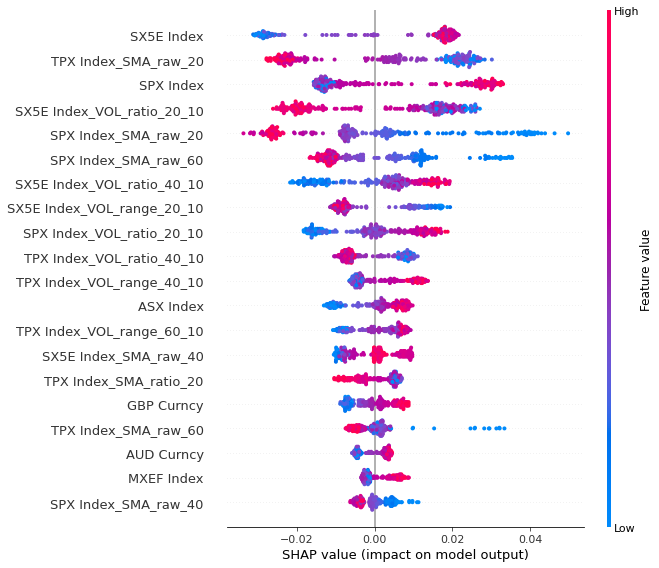

In [424]:
extract_num = 5
model_pattern = "ensembled"

futures_return_ = metabt.futures_return.loc[position_.index]
position_ = report_result[model_pattern]["position"]
profit_ = report_result[model_pattern]["profit"]
shap_values_  = pd.DataFrame(
    report_result[model_pattern]["shap_values"]["values"],
    index=profit_.index,
    columns=report_result[model_pattern]["shap_values"]["feature_names"]
    )
probability_ = report_result[model_pattern]["probability"]

futures_index_ = metabt.futures_return.loc[position_.index].cumsum()

if model_pattern == "ensembled":
    position_betsize = report_result[model_pattern]["position_betsize"]

shap_values_extracted = []
shap_values_extracted_name = []
for i in range(shap_values_.shape[0]):
    temp = shap_values_.iloc[i, :].apply(np.abs).sort_values(ascending=False)[:extract_num].index    
    temp_i = shap_values_.iloc[i, :][temp]
    shap_values_extracted += [list(temp_i.round(4).values)]
    shap_values_extracted_name += [list(temp_i.index)]

def _convert(x):
    if x > 0:
        return "Long"
    elif x < 0:
        return "Short"
    else:
        return "Hold"

customdata = [[_convert(pos)] + shap_values_extracted_name[i] + shap_values_extracted[i] for i, pos in enumerate(list(position_))]

hovertemplate = "Date: %{x} <br>総損益: %{y} <br>position: %{customdata[0]} <br> ----- shap -------" \
    + "<br> 1.%{customdata[1]}(%{customdata[6]})<br> 2.%{customdata[2]}(%{customdata[7]})<br> 3.%{customdata[3]}(%{customdata[8]})" \
    + "<br> 4.%{customdata[4]}(%{customdata[9]})<br> 5.%{customdata[5]}(%{customdata[10]})"        

fig = go.Figure()
fig = make_subplots(
    rows=3, cols=1, 
    specs=[
        [{"secondary_y": True}],
        [{"secondary_y": False}],
        [{"secondary_y": False}],        
        ],
    shared_xaxes=True, vertical_spacing=0.01, row_width=[0.2, 0.2, 0.8], x_title="Date"
    )
############################################################################
# 損益推移
fig.add_trace(
    go.Scatter(
        x=profit_.index,
        y=profit_.values, 
        customdata=customdata,        
        name="総損益推移",
        mode="lines",        
        ), row=1, col=1
    )

fig.add_trace(
    go.Scatter(
        x=profit_.index,
        y=list(futures_index_.values),
        name="取引対象のインデックス推移",
        mode="lines",                
    ), 
    secondary_y=True,
    row=1, col=1,
)

fig.add_trace(
    go.Scatter(
        x=profit_[position_>0].index, 
        y=profit_[position_>0].round(2).values, 
        name="Long", 
        customdata=[customdata[i] for i in range(len(position_)) if position_[i]>0],        
        mode="markers", 
        marker_symbol="triangle-up", 
        marker_size=9, 
        marker_color="red"
        ), row=1, col=1
    )
fig.add_trace(
    go.Scatter(
        x=profit_[position_<0].index, 
        y=profit_[position_<0].round(2).values, 
        name="Short", 
        customdata=[customdata[i] for i in range(len(position_)) if position_[i]<0],
        mode="markers", 
        marker_symbol="triangle-down", 
        marker_size=9, 
        marker_color="black"
        ),
    row=1, col=1
    )
fig.update_traces(
    hovertemplate=hovertemplate,
    )
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    xaxis=dict(
        tickformat="%y "
        ),
    width=1500,    
    height=700
)
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

#############################################################################################
if model_pattern == "ensembled":
    y_ = position_betsize
    name_ = "アンサンブルベッドサイズ"
else:
    y_ = probability_.values
    name_ = "予測確率"
    
fig.update_xaxes(matches="x")
fig.add_trace(
    go.Scatter(
        x=probability_.index,
        y=y_, 
        name=name_,
        mode="lines",
        ), row=2, col=1
    )
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    xaxis=dict(
        tickformat="%y "
        ),
)
fig.update_layout(
    title=dict(text='<b>'+model_pattern,
                font=dict(size=26,
                         color='grey'),
                   y=0.88,),
                legend=dict(xanchor='left',
                            yanchor='bottom',
                            x=0.02,
                            y=0.78,
                            ),
                yaxis=dict(
                      title='総損益',
                      )
                   
)

#############################################################################################
fig.show()

#############################################################################################
fig = go.Figure(
    data=[go.Table(
        header=dict(values=[""] + list(score_.columns)),
        cells=dict(values=[list(score_.index)] + [[int(j) if not isinstance(j, float) or np.abs(j) > 100 else round(j, 3) for j in list(score_.iloc[:,i])] for i in range(3)])
            )
        ]
    )
fig.show()

import shap
shap.summary_plot(
    shap_values=report_result[model_pattern]["shap_values"]["values"],
    features=report_result[model_pattern]["shap_values"]["data"],
    feature_names=report_result[model_pattern]["shap_values"]["feature_names"]
    )

In [378]:
print(fig["data"])

(Scatter({
    'customdata': [['Long', 'SPX Index_SMA_raw_60', 'SPX Index_SMA_raw_20', 'TPX
                   Index_SMA_raw_20', 'SX5E Index', 'SX5E Index_VOL_ratio_20_10',
                   0.0349, 0.0339, -0.0218, 0.0197, 0.0196], ['Long', 'SPX
                   Index_SMA_raw_60', 'SPX Index_SMA_raw_20', 'SPX Index', 'TPX
                   Index_SMA_raw_20', 'SX5E Index_VOL_ratio_20_10', 0.0325, 0.0286,
                   0.024, -0.0202, 0.018], ['Long', 'SPX Index_SMA_raw_60', 'SPX
                   Index_SMA_raw_20', 'SPX Index', 'SX5E Index', 'TPX
                   Index_SMA_raw_20', 0.0327, 0.0268, 0.025, 0.0199, -0.0198], ...,
                   ['Long', 'SPX Index_SMA_raw_20', 'SX5E Index', 'TPX
                   Index_SMA_raw_60', 'SX5E Index_VOL_ratio_40_10', 'TPX
                   Index_SMA_raw_20', 0.0463, -0.0307, 0.0294, -0.0208, 0.0206],
                   ['Long', 'SPX Index_SMA_raw_20', 'SPX Index_SMA_raw_60', 'TPX
                   Index_SMA_raw_60', 'TPX Ind

In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objects as go

default_fig = px.line(
    wealth_summary, x="year", y="総損益", 
    title="総損益推移")
default_fig.update_traces(
    mode="markers+lines", 
    hovertemplate=None
    )

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Hovermode"),
    dcc.RadioItems(
        id='hovermode',
        labelStyle={'display': 'inline-block'},
        options=[{'label': x, 'value': x} 
                 for x in [5, 10, 20]],
        value='closest'
    ),
    dcc.Graph(id="graph", figure=default_fig),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("hovermode", "value")], 
    [State('graph', 'figure')])
def update_hovermode(mode, fig_json):
    fig = go.Figure(fig_json)
    fig.update_layout(hovermode=mode)

    return fig

app.run_server(debug=True)

トータル                            \
                                          総損益          総利益          総損失   
temp_mining 20220116_222555_l1t2  4527.415013  9874.542237 -5347.127224   
model1      20220116_192758        4130.52738   9676.09842  -5545.57104   
temp_mining 20220116_222555_l0t0  3938.093155  9579.881308 -5641.788153   
            20220116_222555_l0t3  3820.284896  9520.977178 -5700.692282   
            20220116_222555_l0t7  3756.396495  9489.032978 -5732.636483   
            20220116_222555_l0t9  3711.302192  9466.485826 -5755.183634   
            20220116_222555_l0t5  3670.076977  9445.873219 -5775.796242   
            20220116_222555_l1t7  3355.942538  9288.805999 -5932.863461   
            20220116_222555_l0t6  3089.835544  9155.752502 -6065.916958   
            20220116_222555_l1t5   3057.57057  9139.620015 -6082.049446   
            20220116_222555_l0t4  3021.432705  9121.551083 -6100.118378   
            20220116_222555_l0t2  2965.053528  9093.361494 -6128.307966   
            20220116_222555_l1t3  2929.243966  9075.456713 -6146.212747   
            20220116_222555_l0t8  2744.326963  8982.998212 -6238.671249   
            20220116_222555_l0t1  2619.705313  8920.687387 -6300.982074   
            20220116_222555_l1t8  2335.045563  8778.357512 -6443.311949   
            20220116_222555_l1t1  1822.385504  8522.027482 -6699.641978   
            20220116_222555_l1t6  1509.340064  8365.504762 -6856.164698   
            20220116_222555_l1t4  1500.791166  8361.230313 -6860.439147   
            20220116_222555_l1t0  1334.703825  8278.186643 -6943.482818   
            20220116_222555_l1t9  1257.114637  8239.392049 -6982.277412   

                                                                             \
                                 総トレード数 利益トレード数 損失トレード数        勝率      損益平均   
temp_mining 20220116_222555_l1t2  752.0   438.0   266.0  0.582447  6.020499   
model1      20220116_192758       752.0   416.0   288.0  0.553191  5.492723   
temp_mining 20220116_222555_l0t0  752.0   410.0   294.0  0.545213  5.236826   
            20220116_222555_l0t3  752.0   418.0   286.0  0.555851  5.080166   
            20220116_222555_l0t7  752.0   414.0   290.0  0.550532  4.995208   
            20220116_222555_l0t9  752.0   426.0   278.0  0.566489  4.935242   
            20220116_222555_l0t5  752.0   420.0   284.0  0.558511  4.880422   
            20220116_222555_l1t7  752.0   418.0   286.0  0.555851   4.46269   
            20220116_222555_l0t6  752.0   392.0   312.0  0.521277  4.108824   
            20220116_222555_l1t5  752.0   418.0   286.0  0.555851  4.065918   
            20220116_222555_l0t4  752.0   416.0   288.0  0.553191  4.017863   
            20220116_222555_l0t2  752.0   398.0   306.0  0.529255   3.94289   
            20220116_222555_l1t3  752.0   418.0   286.0  0.555851  3.895271   
            20220116_222555_l0t8  752.0   396.0   308.0  0.526596  3.649371   
            20220116_222555_l0t1  752.0   404.0   300.0  0.537234  3.483651   
            20220116_222555_l1t8  752.0   412.0   292.0  0.547872  3.105114   
            20220116_222555_l1t1  752.0   384.0   320.0  0.510638  2.423385   
            20220116_222555_l1t6  752.0   396.0   308.0  0.526596  2.007101   
            20220116_222555_l1t4  752.0   372.0   332.0  0.494681  1.995733   
            20220116_222555_l1t0  752.0   406.0   298.0  0.539894  1.774872   
            20220116_222555_l1t9  752.0   398.0   306.0  0.529255  1.671695   

                                                          ...         売り  \
                                        最大利益        最大損失  ...     損失の平均値   
temp_mining 20220116_222555_l1t2  132.140546 -147.037661  ... -25.776832   
model1      20220116_192758       147.037661 -146.432915  ... -18.806977   
temp_mining 20220116_222555_l0t0  147.037661 -146.432915  ... -18.816869   
            20220116_222555_l0t3  147.037661 -146.432915  ... -14.962714   
            20220116_222555_l0t7  147.037